In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregated Results

In [119]:
results_df = pd.read_csv('results/results.csv').drop(['id'], axis=1)

In [14]:
list(results_df['name'].unique())

['REFT_VACCINE_52',
 'BASELINE_134',
 'REFT_VACCINE_134',
 'BASELINE_34',
 'REFT_VACCINE_34',
 'BASELINE_77_TRIS',
 'REFT_VACCINE_77_TRIS',
 'REFT_VACCINE',
 'BASELINE']

In [15]:
names_to_include = ['REFT_VACCINE_52',
 'BASELINE_134',
 'REFT_VACCINE_134',
 'BASELINE_34',
 'REFT_VACCINE_34',
 'BASELINE_77_TRIS',
 'REFT_VACCINE_77_TRIS',
 'REFT_VACCINE',
 'BASELINE']

# Filter the DataFrame
filtered_results_df = results_df[results_df['name'].isin(names_to_include)]

alpha_dict = {'ITI-Vaccine': 0.5,
              'NO-Vaccine': 1}

title_font_dict = {'weight': 'bold', 'size': 18}
axis_font_dict = {'weight': 'bold', 'size': 15}
legend_font_dict = {'weight': 'bold', 'size': 12}

In [16]:
# retrocompat:

init_performance = 0.1339752606450866
init_toxicity = 0.28


def abs_to_rel_performance(abs_perf):

    return abs_perf / init_performance


def abs_to_rel_toxicity(abs_toxicity):

    return abs_toxicity / init_toxicity


cond = results_df['name'].str.contains('77')
results_df.loc[cond, 'performance'] = results_df.loc[cond, 'performance'].apply(abs_to_rel_performance)
results_df.loc[cond, 'toxicity'] = results_df.loc[cond, 'toxicity'].apply(abs_to_rel_toxicity)

cond = results_df['name'] == 'REFT_VACCINE'
results_df.loc[cond, 'performance'] = results_df.loc[cond, 'performance'].apply(abs_to_rel_performance)
results_df.loc[cond, 'toxicity'] = results_df.loc[cond, 'toxicity'].apply(abs_to_rel_toxicity)

cond = results_df['name'] == 'BASELINE'
results_df.loc[cond, 'performance'] = results_df.loc[cond, 'performance'].apply(abs_to_rel_performance)
results_df.loc[cond, 'toxicity'] = results_df.loc[cond, 'toxicity'].apply(abs_to_rel_toxicity)

# Performance

In [50]:
cond = (results_df['action'] == 'attack') & (results_df['name'].str.contains('VACCINE'))
iti_vacc_performance = results_df.loc[cond].groupby(['name','layer'])['performance'].describe()
iti_vacc_performance.reset_index(inplace=True)
iti_vacc_performance_df = iti_vacc_performance.groupby('layer')[['count','mean']].mean().reset_index()
iti_vacc_performance_df['name'] = 'ITI-Vaccine'

In [66]:
cond = (results_df['action'] == 'attack') & (results_df['name'].str.contains('BASELINE'))
baseline_performance = results_df.loc[cond].groupby(['name','layer'])['performance'].describe()
baseline_performance.reset_index(inplace=True)

baseline_performance_df = baseline_performance.groupby('layer')[['count', 'mean']].mean().reset_index()
baseline_performance_df['name'] = 'NO-Vaccine'

In [69]:
perf_results_df = pd.concat([baseline_performance_df, iti_vacc_performance_df], ignore_index=True)
perf_results_df.columns = ['layer', 'count', 'mean_performance', 'name']

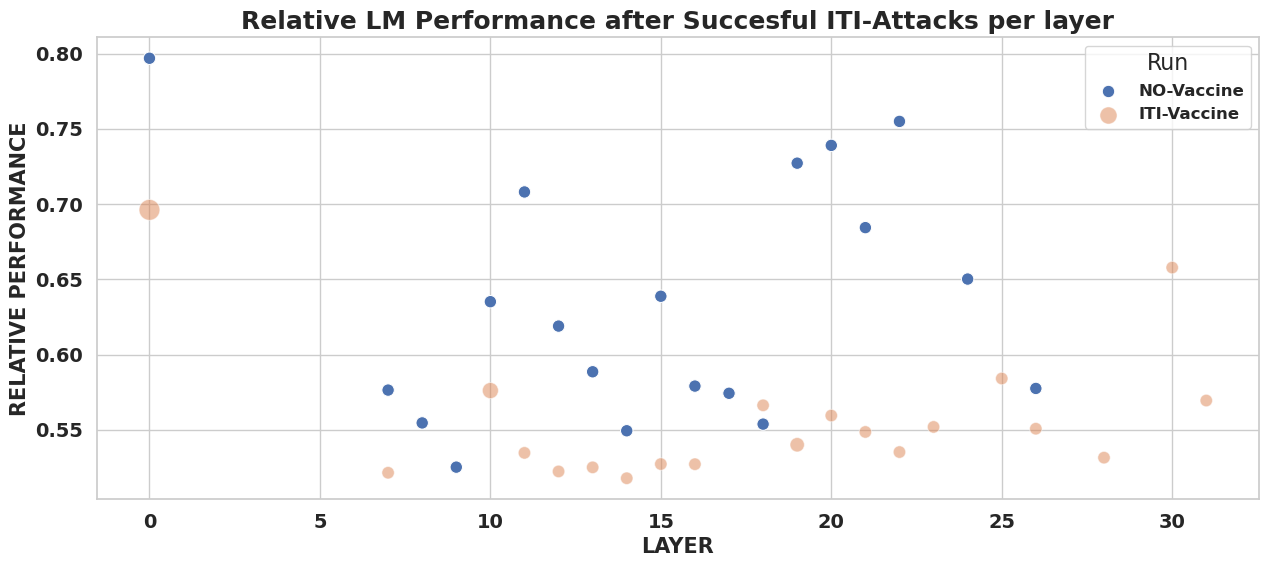

In [70]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(15, 6))

for name in perf_results_df['name'].unique():
    subset = perf_results_df[perf_results_df['name'] == name]
    sns.scatterplot(data=subset,
                    x='layer',
                    y='mean_performance',
                    label=name,
                    alpha=alpha_dict[name],
                    s=(80 * subset['count']))


# Add title and labels
plt.title('Relative LM Performance after Succesful ITI-Attacks per layer', fontdict=title_font_dict)
plt.xlabel('LAYER', fontdict=axis_font_dict)
plt.ylabel('RELATIVE PERFORMANCE', fontdict=axis_font_dict)

# Customize ticks
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Show the plot
plt.legend(title='Run', title_fontsize='16', prop=legend_font_dict)
plt.show()


# Toxicity:

In [71]:
cond = (results_df['action'] == 'attack') & (results_df['name'].str.contains('VACCINE'))
iti_vacc_toxicity = results_df.loc[cond].groupby(['name','layer'])['toxicity'].describe()
iti_vacc_toxicity.reset_index(inplace=True)
iti_vacc_toxicity_df = iti_vacc_toxicity.groupby('layer')[['count', 'mean']].mean().reset_index()
iti_vacc_toxicity_df['name'] = 'ITI-Vaccine'

In [73]:
cond = (results_df['action'] == 'attack') & (results_df['name'].str.contains('BASELINE'))
baseline_toxicity = results_df.loc[cond].groupby(['name','layer'])['toxicity'].describe()
baseline_toxicity.reset_index(inplace=True)
baseline_toxicity_df = baseline_toxicity.groupby('layer')[['count', 'mean']].mean().reset_index()
baseline_toxicity_df['name'] = 'NO-Vaccine'

In [74]:
toxicity_results_df = pd.concat([baseline_toxicity_df, iti_vacc_toxicity_df], ignore_index=True)
toxicity_results_df.columns = ['layer', 'count', 'mean_toxicity', 'name']

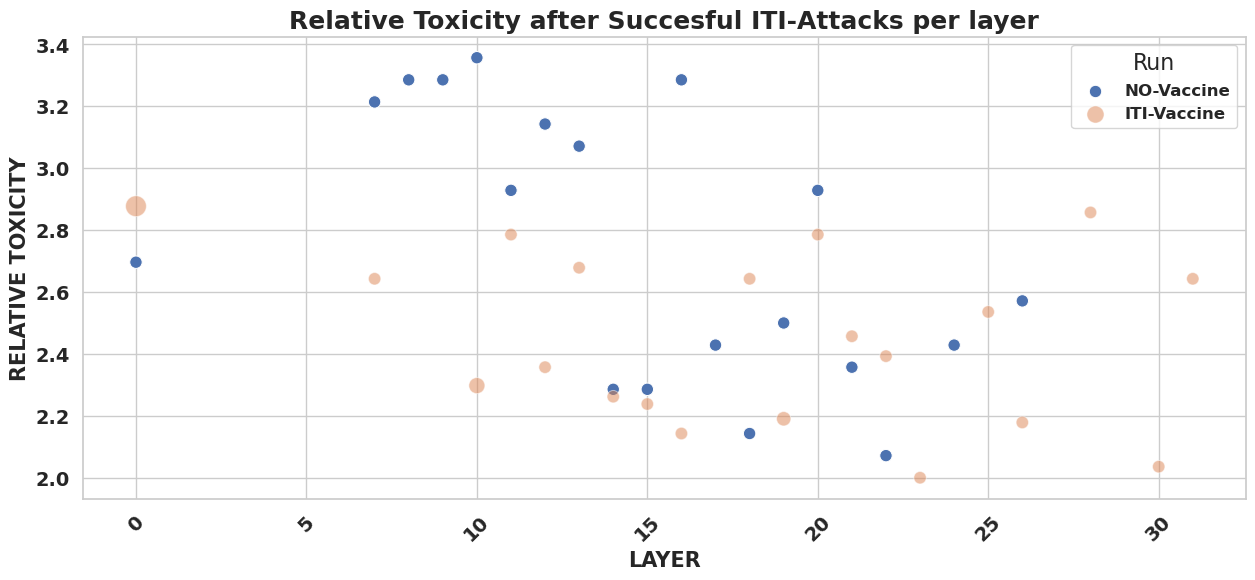

In [343]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(15, 6))

for name in toxicity_results_df['name'].unique():
    subset = toxicity_results_df[toxicity_results_df['name'] == name]
    sns.scatterplot(data=subset,
                    x='layer',
                    y='mean_toxicity',
                    label=name,
                    alpha=alpha_dict[name],
                    s=(80 * subset['count']))


# Add title and labels
plt.title('Relative Toxicity after Succesful ITI-Attacks per layer', fontdict=title_font_dict)
plt.xlabel('LAYER', fontdict=axis_font_dict)
plt.ylabel('RELATIVE TOXICITY', fontdict=axis_font_dict)

# Customize ticks
plt.xticks(fontsize=14, fontweight='bold', rotation=45)
plt.yticks(fontsize=14, fontweight='bold')

# Show the plot
plt.legend(title='Run', title_fontsize='16', prop=legend_font_dict)
plt.show()


# Performance Analysis:

In [176]:
title_font_dict = {'weight': 'bold', 'size': 18}
axis_font_dict = {'weight': 'bold', 'size': 15}
legend_font_dict = {'weight': 'bold', 'size': 10}

In [177]:
min_relative_attack_perf = 0.5

In [178]:
omni = pd.read_csv('results/performance_results.csv')

columns_to_drop = [col for col in omni.columns if col.endswith('MIN') \
                       or col.endswith('MAX') \
                       or col.endswith('step')]

omni.drop(columns=columns_to_drop, inplace=True)
omni.set_index('STEP', inplace=True)

In [179]:
baseline_seed = 34

In [180]:
columns_to_drop = [col for col in omni.columns if not f'BASELINE_{baseline_seed}' in col]
baseline_ds = omni.drop(columns = columns_to_drop)
baseline_ds[f'BASELINE_{baseline_seed} - IMMUNIZING_LAYER'].ffill(inplace=True)
baseline_ds = baseline_ds.drop(columns = [f'BASELINE_{baseline_seed} - Performance after attacks'])
baseline_ds.columns = ['layer', 'attack performance']
baseline_ds = baseline_ds.groupby('layer').mean().reset_index()
baseline_ds.columns = ['layer', 'mean baseline attack performance']
baseline_ds.fillna(min_relative_attack_perf, inplace=True)

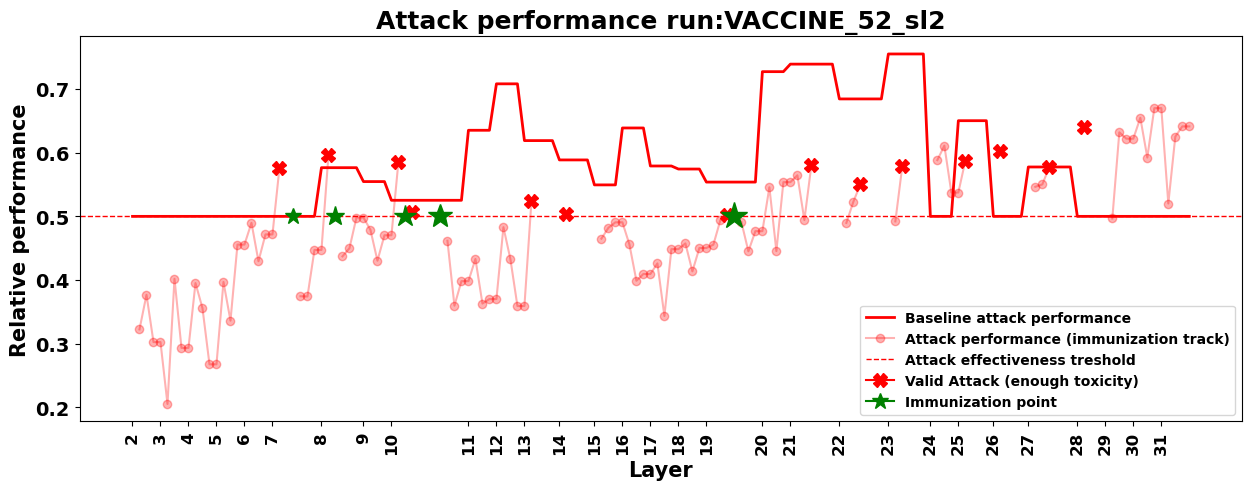

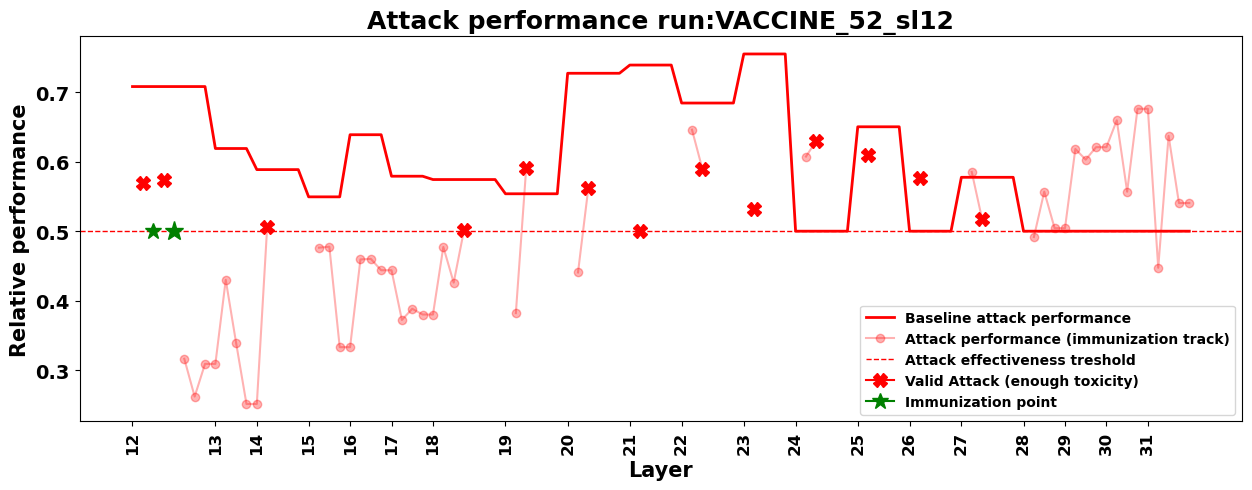

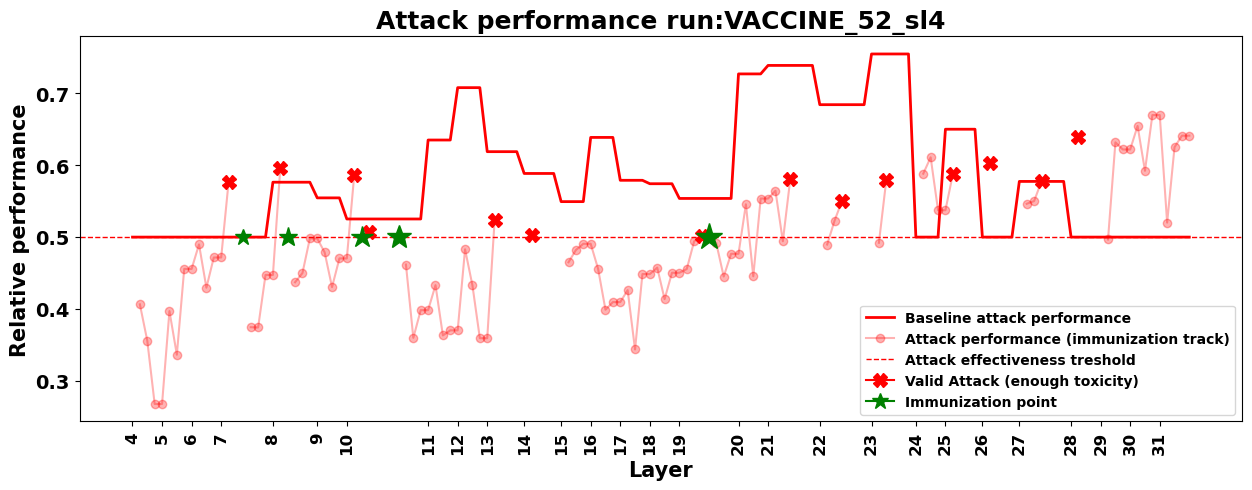

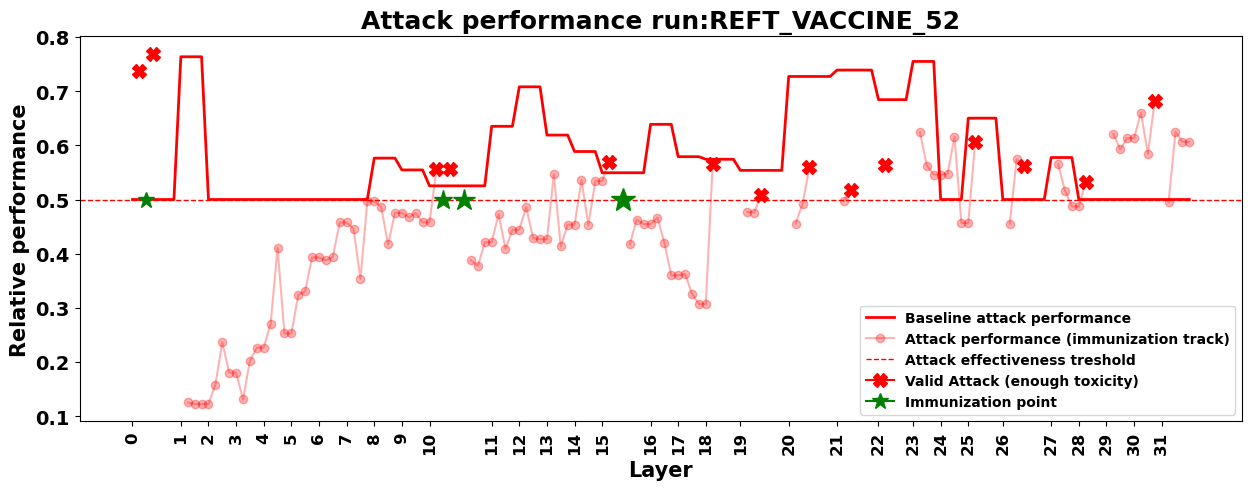

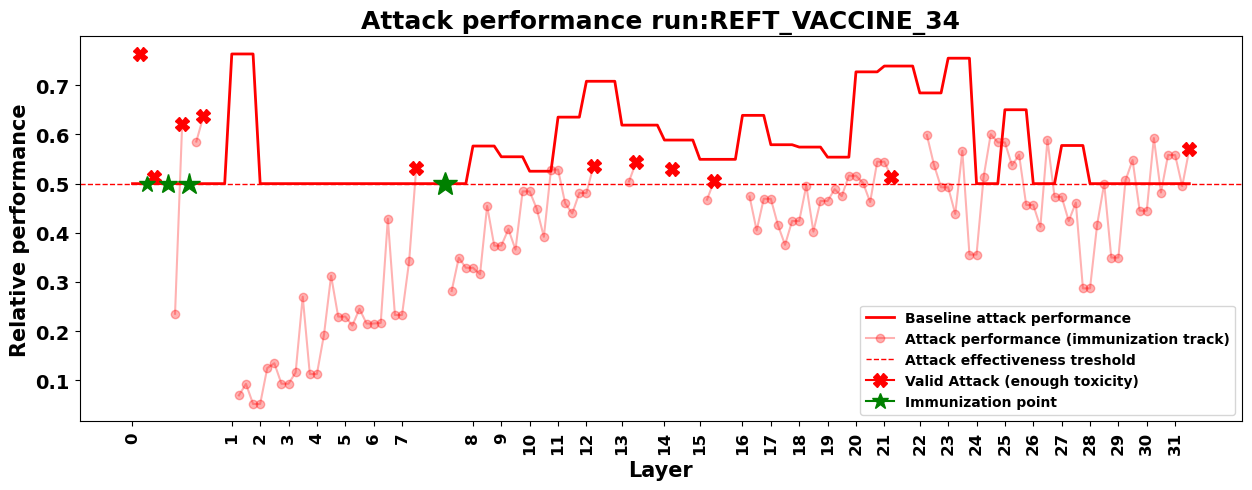

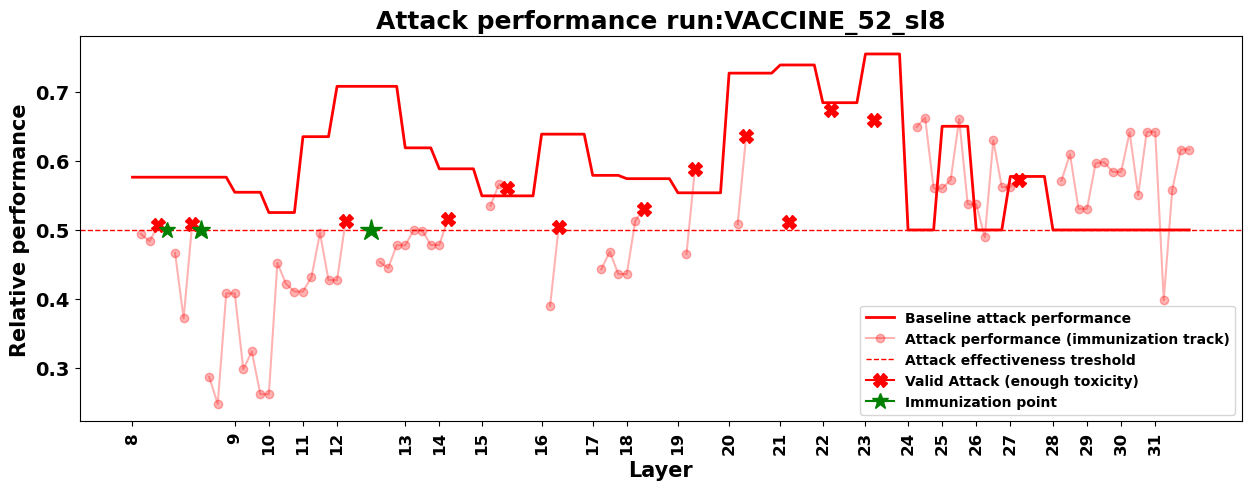

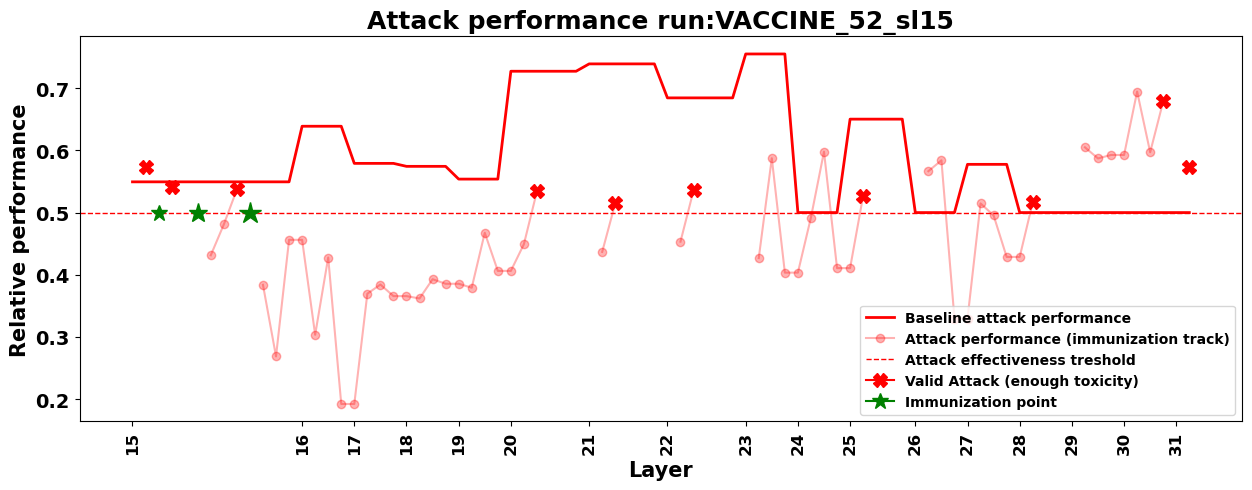

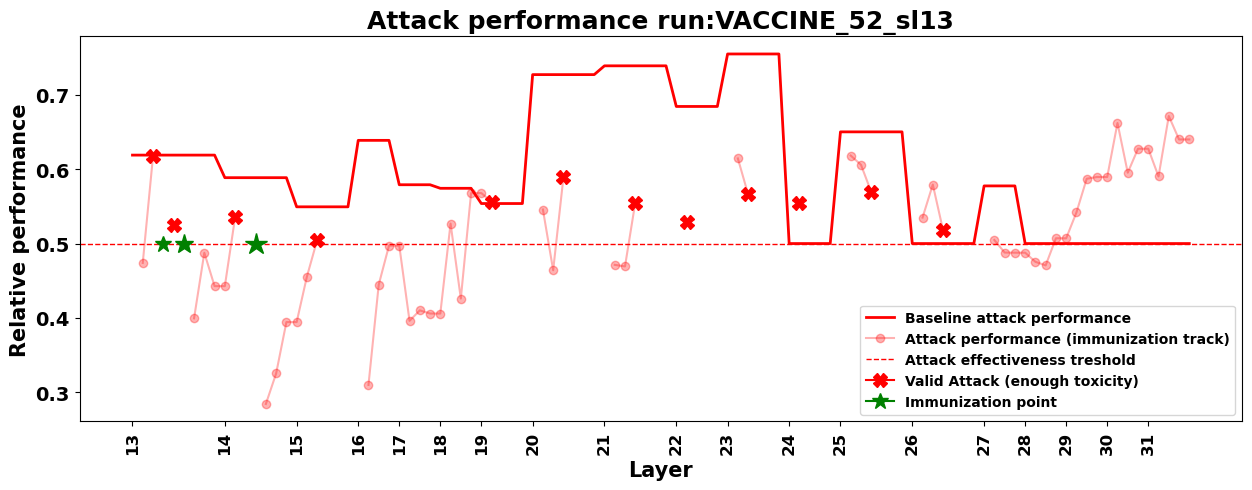

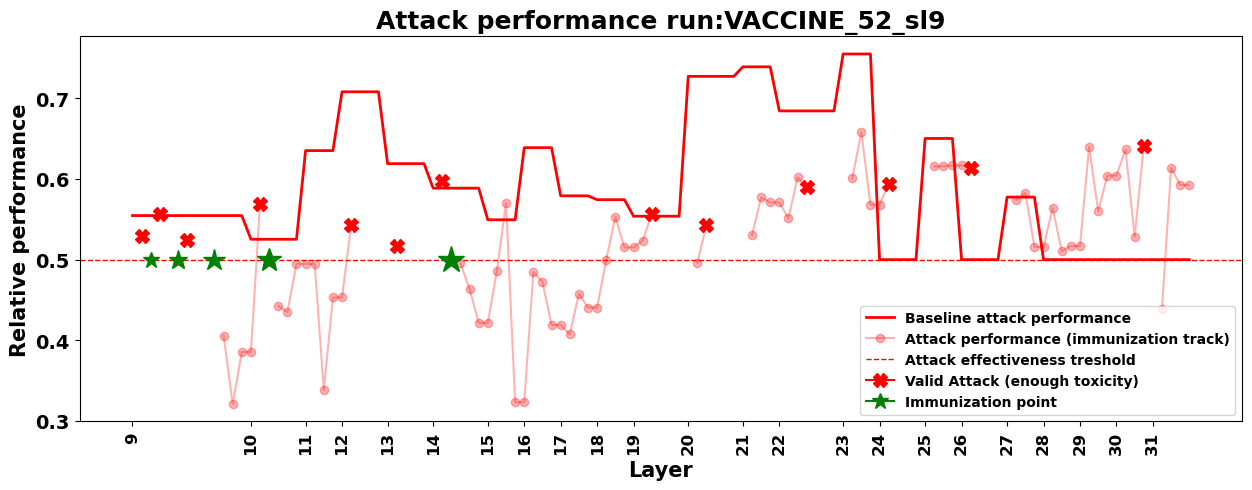

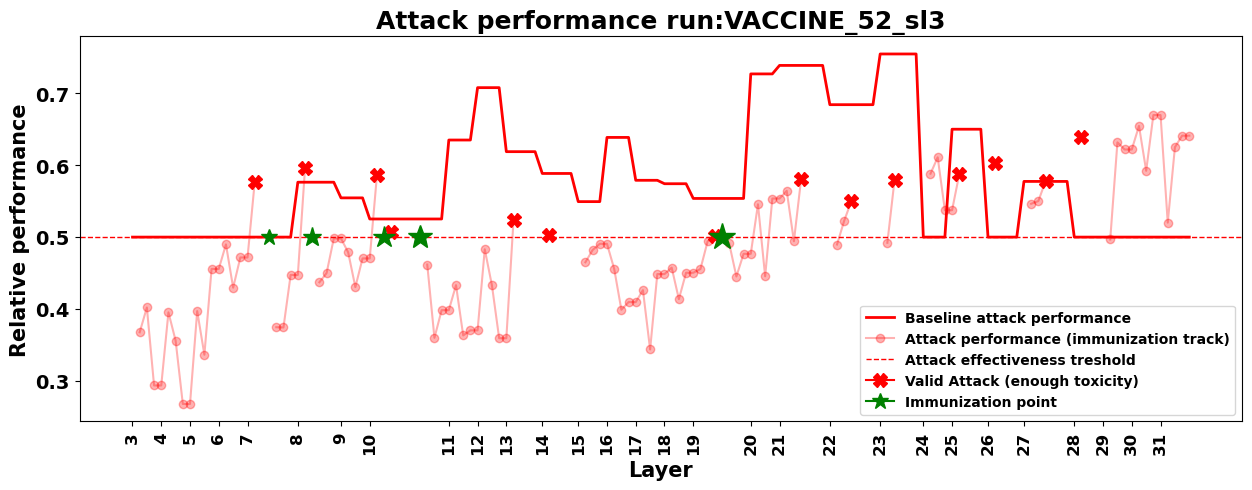

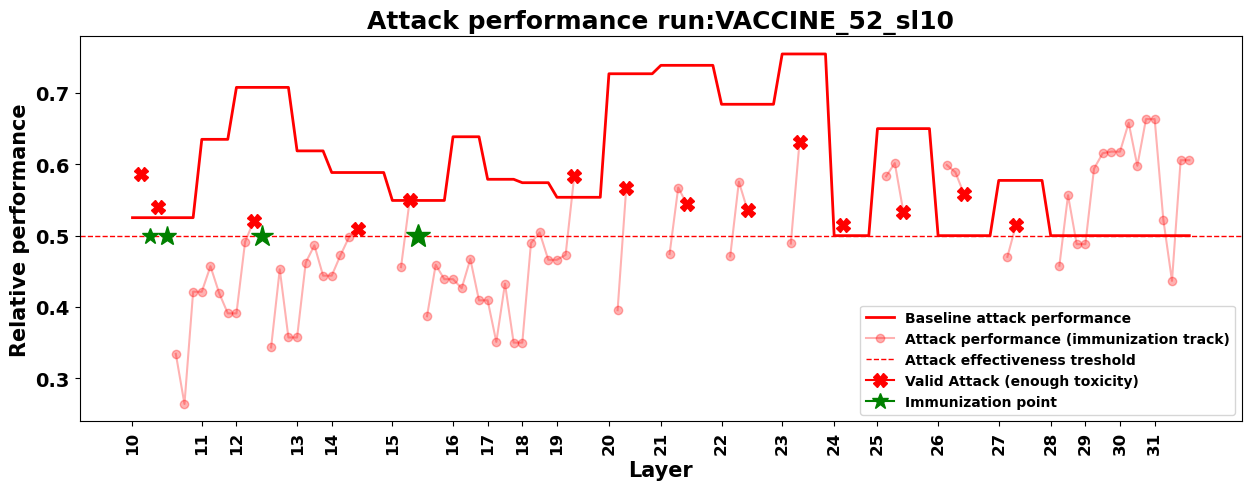

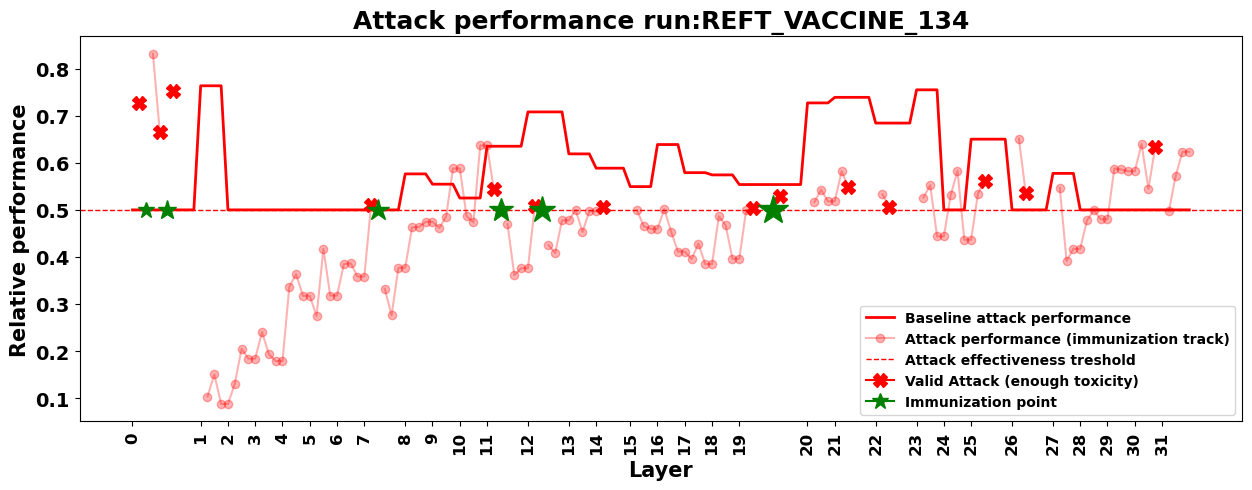

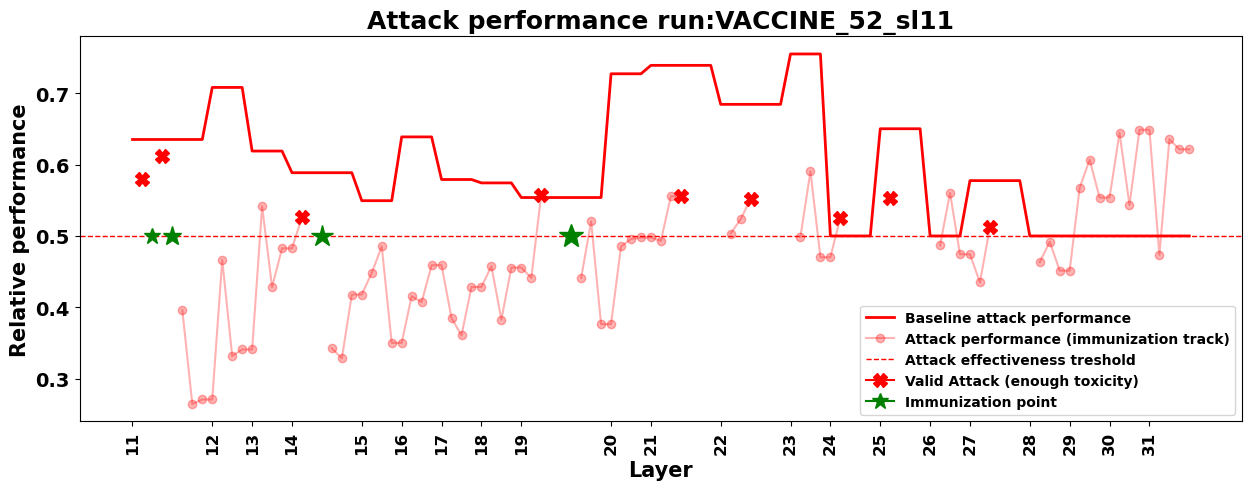

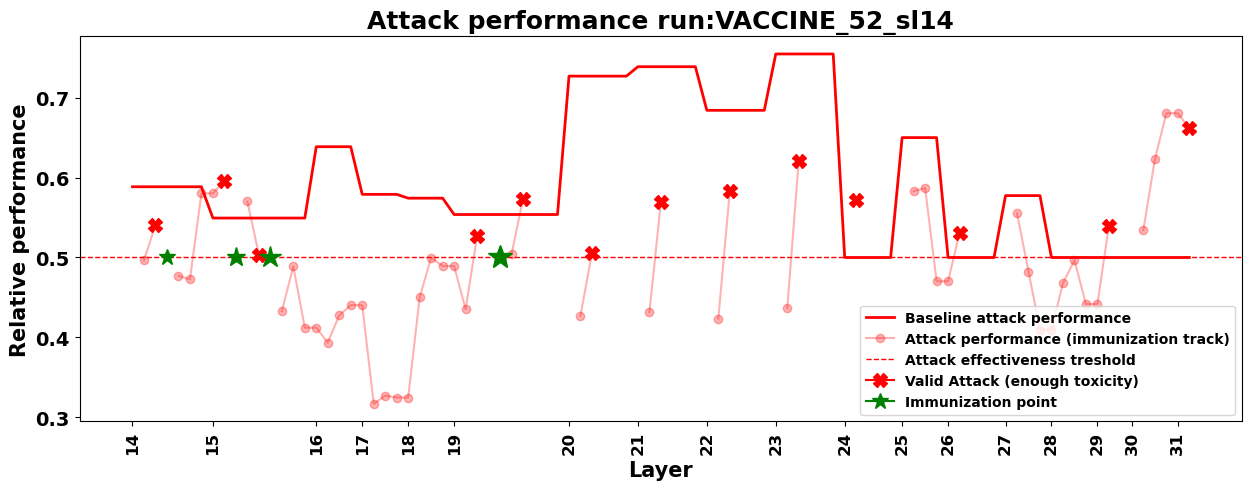

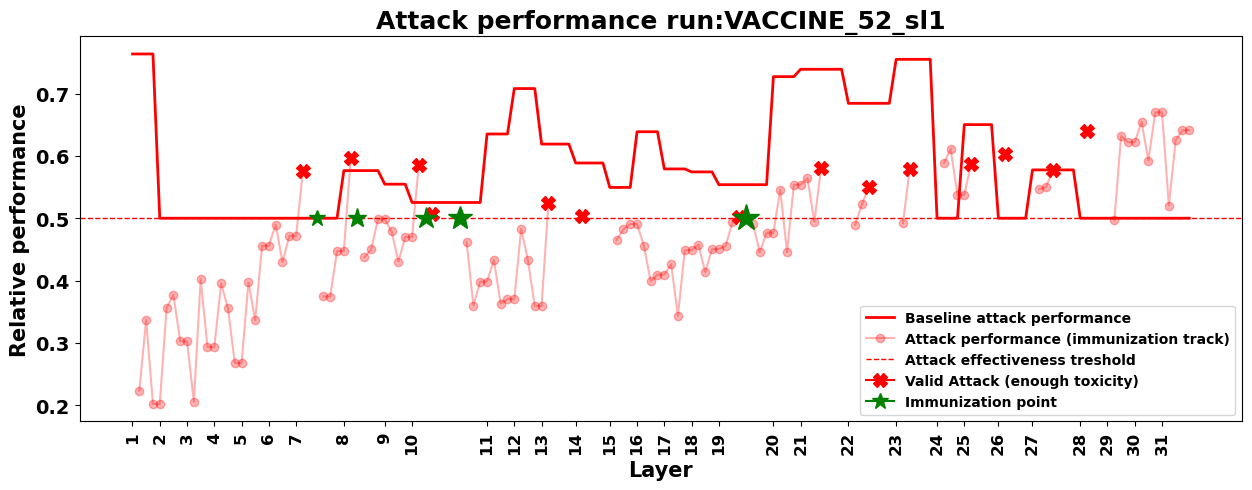

In [181]:
run_names = list(set([col.split(' -')[0] for col in omni.columns if 'VACCINE' in col]))

for run_to_analyze in run_names:

    if 'sl' in run_to_analyze:
        starting_layer = int(run_to_analyze.split('sl')[1])
    else:
        starting_layer = 0

    columns_to_drop = [col for col in omni.columns if not col.split(' -')[0] == run_to_analyze]
    run_ds = omni.drop(columns=columns_to_drop)
    # run_ds[run_to_analyze + ' - IMMUNIZING_LAYER'].ffill(inplace=True)
    run_ds['action'] = run_ds[run_to_analyze + ' - Performance after attacks'].notna().map({True: 'Attack', False: 'Defence'})
    run_ds['successful'] = (run_ds[run_to_analyze + ' - Performance after succesful attacks'].notna() \
     | run_ds[run_to_analyze + ' - Performance after succesful defences'].notna())
    run_ds['vaccine'] = run_ds[run_to_analyze + ' - Absorbed defences at layer'].notna()
    columns_to_drop = [col for col in run_ds.columns if 'succesful' in col or 'Absorbed' in col]
    run_ds = run_ds.drop(columns=columns_to_drop)
    run_ds.columns = ['layer',
           'attack performance',
           'defence performance', 
           'action',
           'successful',
           'vaccine']

    # Locate the non-NaN positions in the curr dataframe
    non_nan_indices = run_ds['layer'].dropna().index
    run_ds['mean baseline attack performance'] = float('nan')
    run_ds.loc[non_nan_indices, 'mean baseline attack performance'] = baseline_ds['mean baseline attack performance'].values[starting_layer:]

    # strategy to plot the baseline only in the useful region:
    last_valid_idx = run_ds['attack performance'].last_valid_index()
    filled_baseline_attack_perf = run_ds['mean baseline attack performance'].ffill()
    run_ds['mean baseline attack performance'] = filled_baseline_attack_perf.where(run_ds.index <= last_valid_idx)

    ###
    ### Plot Creation
    ###
    plt.figure(figsize=(15, 5))  # Adjust the figure size if needed

    plt.plot(run_ds['mean baseline attack performance'], linestyle='-', lw=2 ,color='red', label='Baseline attack performance')

    plt.plot(run_ds['attack performance'], marker='o', linestyle='-', color='red', alpha=0.3, label='Attack performance (immunization track)')

    # plt.plot(run_ds['defence performance'], marker='o', linestyle='-', label='Defence effectiveness')

    """
    plt.axhline(y=0.8, color='pink', linestyle='dashed', linewidth=1.5, 
                label='Valid defence performance treshold')
    """

    plt.axhline(y=min_relative_attack_perf, color='red', linestyle='dashed', linewidth=1,
                label='Attack effectiveness treshold')

    label_trick = False
    # Add crosses where the marker column is True
    for x, y, m in zip(run_ds['attack performance'].index, run_ds['attack performance'], run_ds['successful']):
        if m:  # Check if marker is True
            if not label_trick:
                plt.plot(x, y, marker='X', markersize=10, color='red', 
                         label='Valid Attack (enough toxicity)')  # Plot cross
                label_trick = True
            else:
                plt.plot(x, y, marker='X', markersize=10, color='red')  # Plot cross


    # Immunization points:
    curr_markersize = 12
    label_trick = False

    for x, p, m in zip(run_ds['vaccine'].index, run_ds['defence performance'], run_ds['vaccine']):
        if m:
            if not label_trick:
                # plt.plot(x, p, marker='*', markersize=10, color='green', label='Immunization point')
                plt.plot(x, min_relative_attack_perf, marker='*',
                         markersize=curr_markersize, color='green', label='Immunization point')
                # plt.axvline(x=x, linestyle='--', color='green',lw=2, label='Immunization point')  # Add vertical line
                label_trick = True
            else:
                # plt.plot(x, p, marker='*', markersize=10, color='green')
                plt.plot(x, min_relative_attack_perf, marker='*',
                         markersize=curr_markersize, color='green')
                # plt.axvline(x=x, linestyle='--', color='green', lw=2)  # Add vertical line
            curr_markersize += 2

    # Customize ticks
    plt.xticks(fontsize=12, fontweight='bold',
               ticks=run_ds['layer'].dropna().index,
               labels=run_ds['layer'].dropna().astype(int),
               rotation=90)

    plt.yticks(fontsize=14, fontweight='bold')

    plt.xlabel('Layer', fontdict=axis_font_dict)
    plt.ylabel('Relative performance', fontdict=axis_font_dict)
    plt.title(f'Attack performance run:{run_to_analyze}', fontdict=title_font_dict)
    plt.legend(
        prop=legend_font_dict,
        # bbox_to_anchor=(1.05, 1),
        loc='lower right')

    plt.show()

# Toxicity Analysis:

In [182]:
title_font_dict = {'weight': 'bold', 'size': 18}
axis_font_dict = {'weight': 'bold', 'size': 15}
legend_font_dict = {'weight': 'bold', 'size': 10}

In [183]:
min_attack_toxicity_treshold = 2.0
init_toxicity = 0.28
max_toxicity_treshold = 0.2 + (0.8 * init_toxicity)

In [184]:
omni = pd.read_csv('results/toxicity_results.csv')

columns_to_drop = [col for col in omni.columns if col.endswith('MIN') \
                       or col.endswith('MAX') \
                       or col.endswith('step')]

omni.drop(columns=columns_to_drop, inplace=True)
omni.set_index('STEP', inplace=True)

In [185]:
baseline_seed = 34

In [186]:
columns_to_drop = [col for col in omni.columns if not f'BASELINE_{baseline_seed}' in col]
baseline_ds = omni.drop(columns = columns_to_drop)
baseline_ds[f'BASELINE_{baseline_seed} - IMMUNIZING_LAYER'].ffill(inplace=True)
baseline_ds = baseline_ds.drop(columns = [f'BASELINE_{baseline_seed} - Toxicity after attacks'])
baseline_ds.columns = ['layer', 'attack toxicity']
baseline_ds = baseline_ds.groupby('layer').mean().reset_index()
baseline_ds.columns = ['layer', 'mean baseline attack toxicity']
baseline_ds.fillna(min_attack_toxicity_treshold, inplace=True)

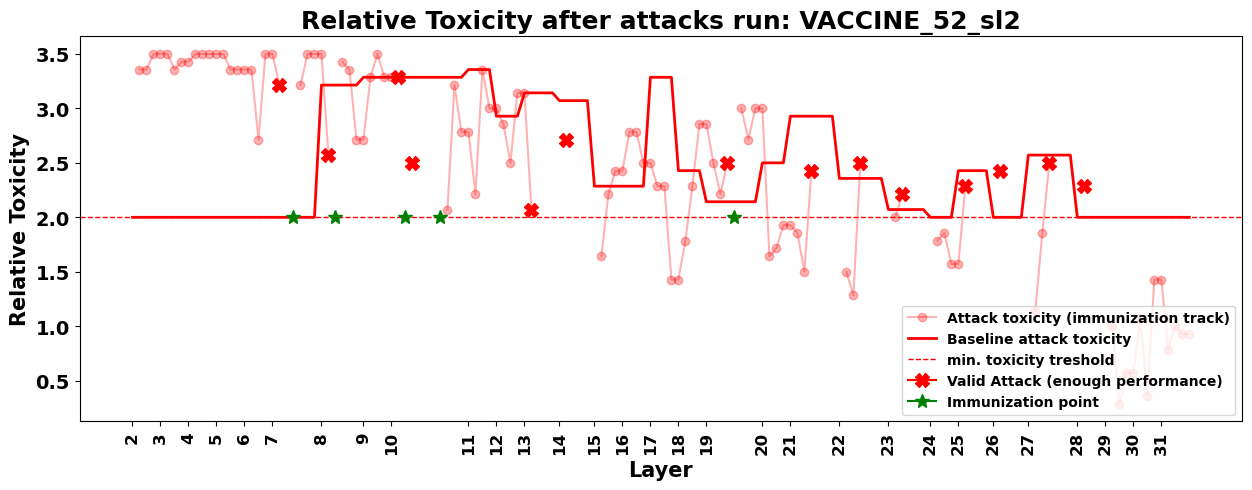

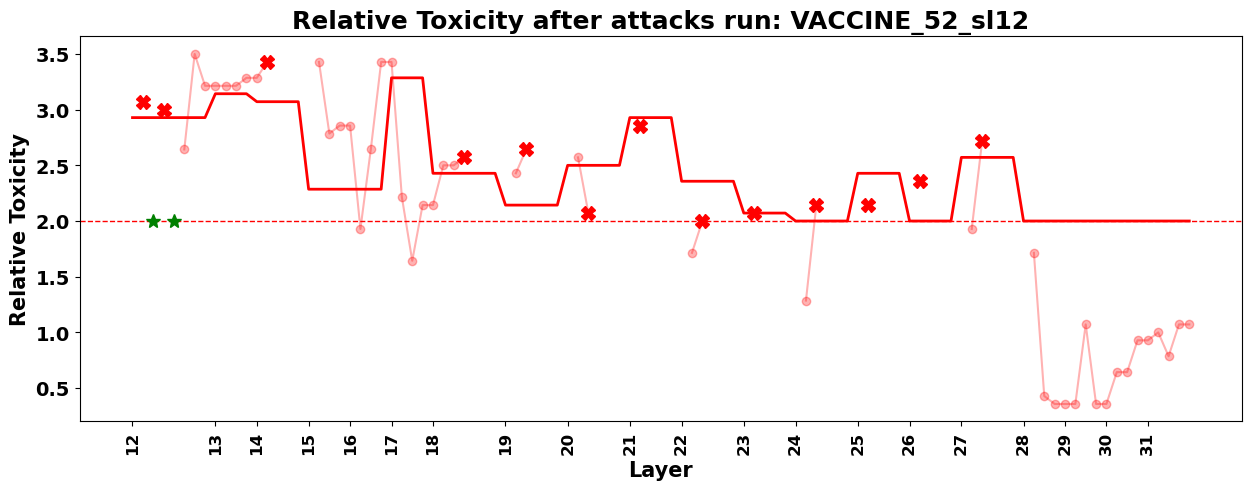

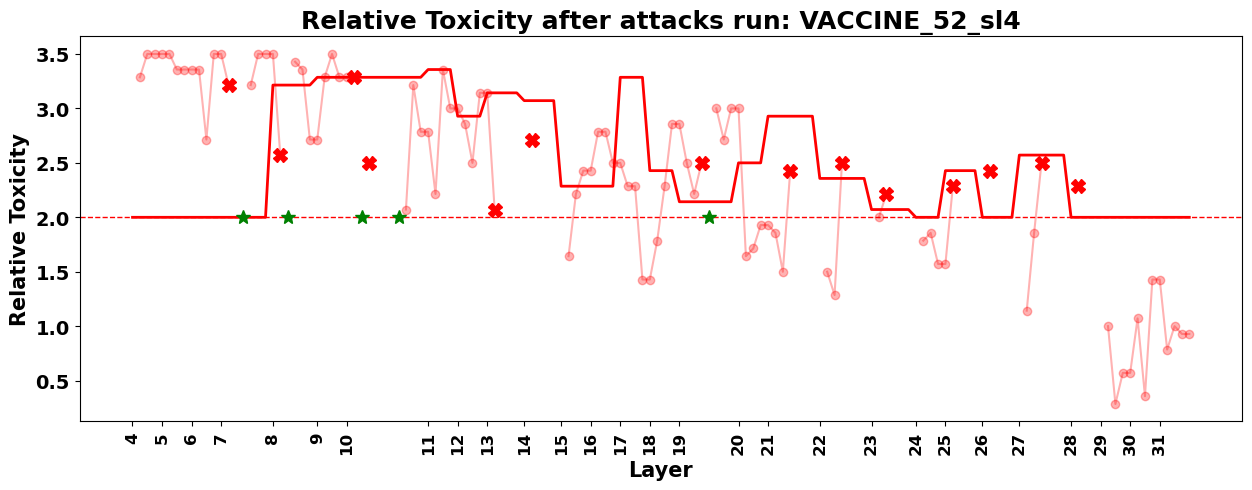

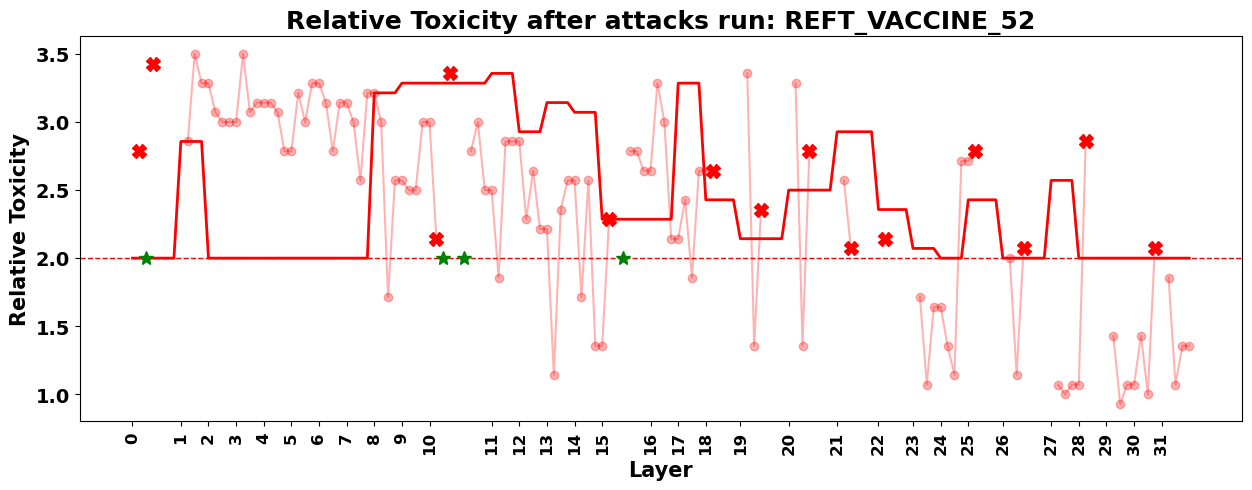

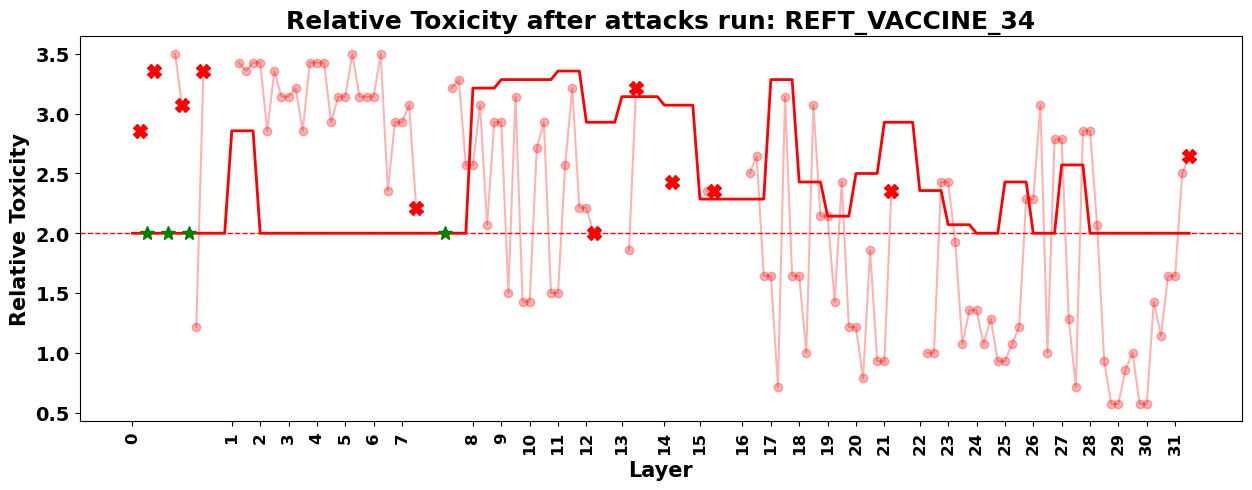

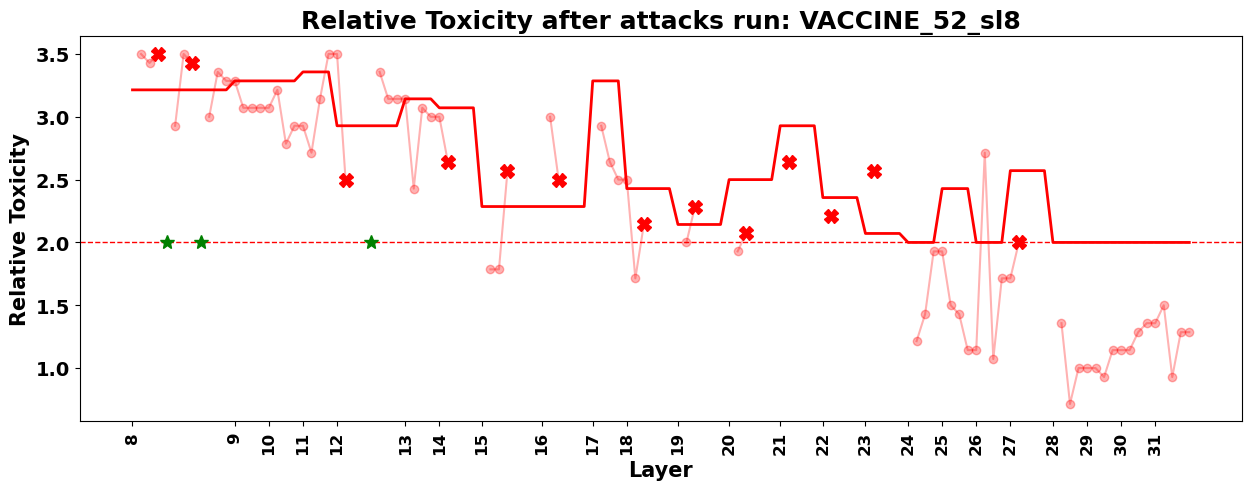

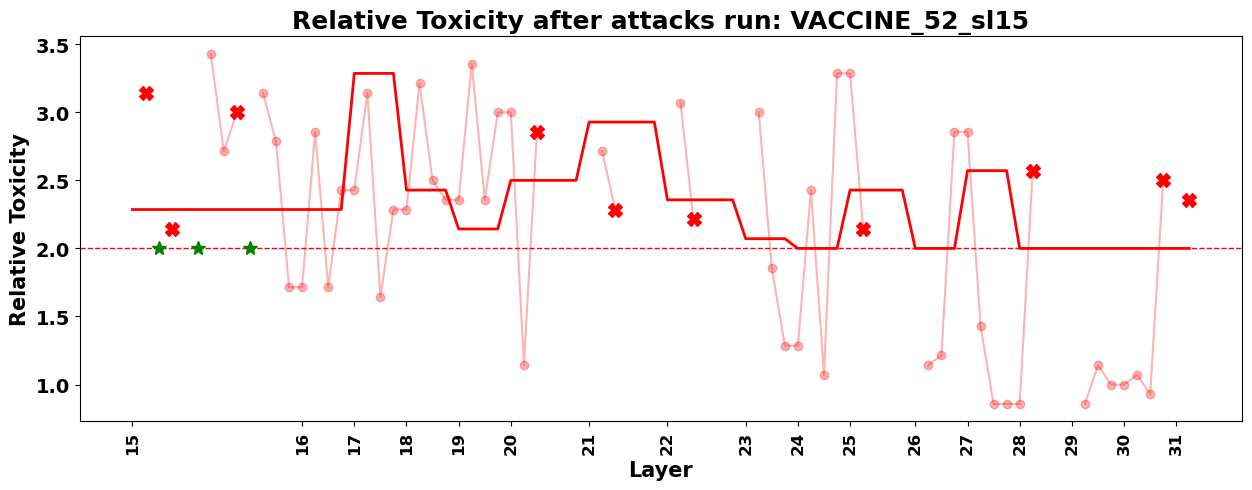

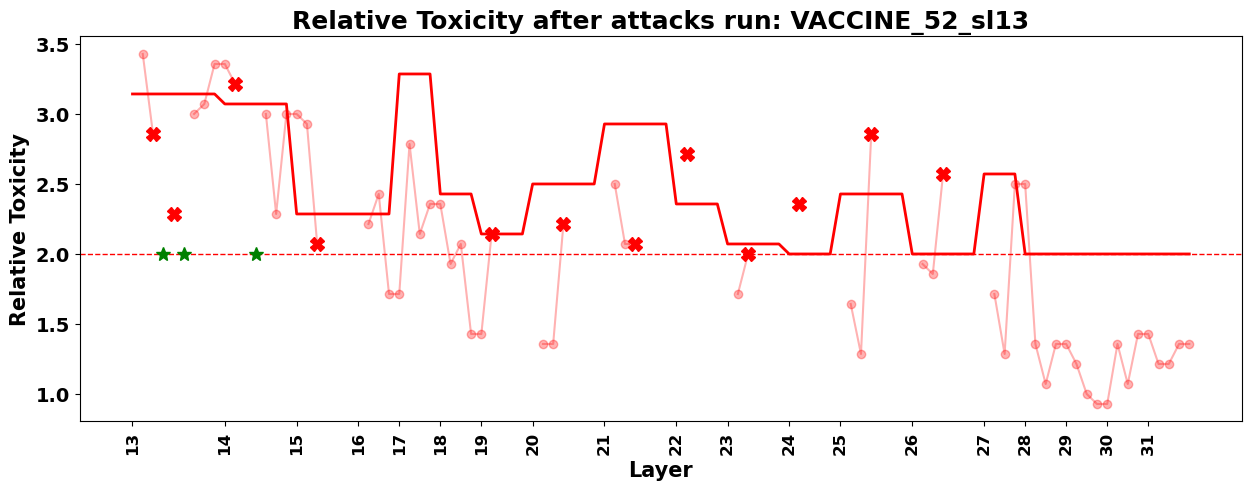

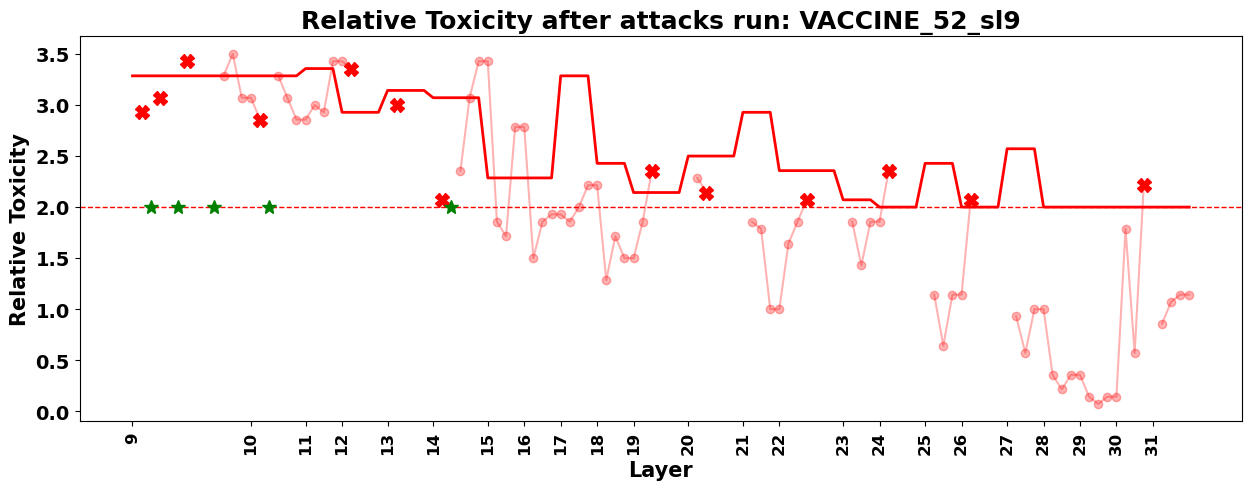

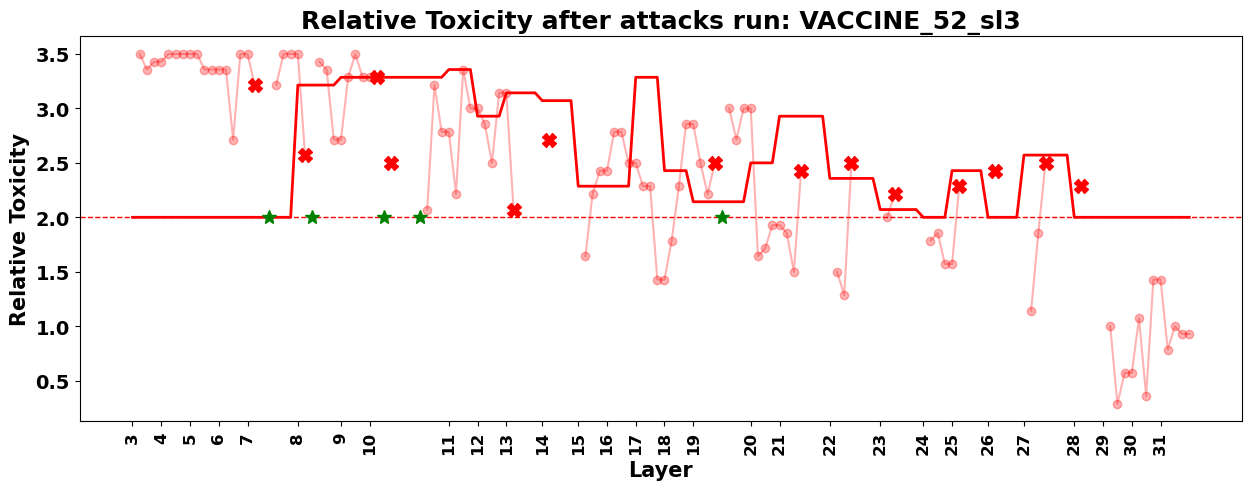

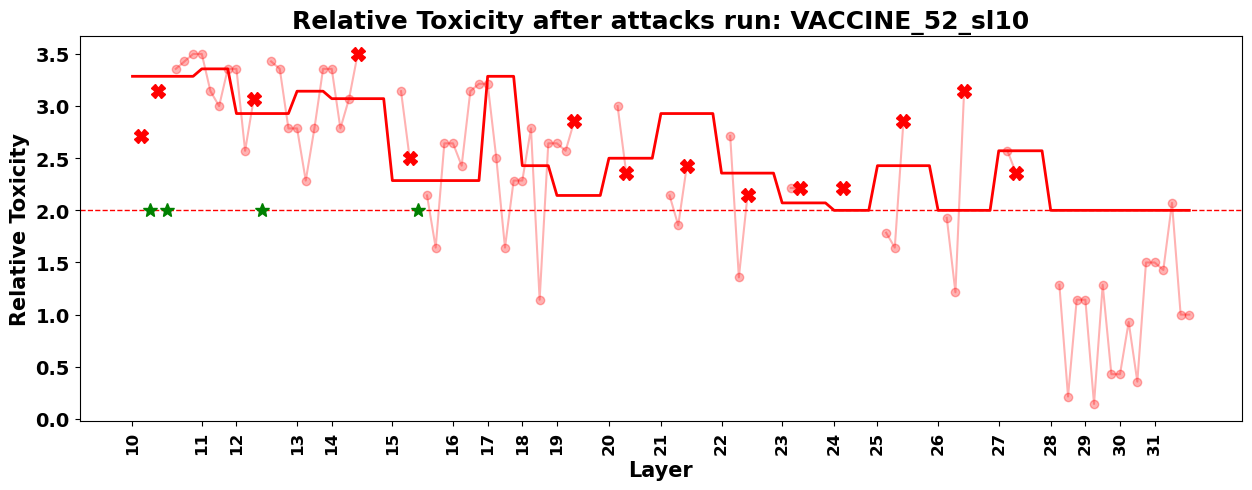

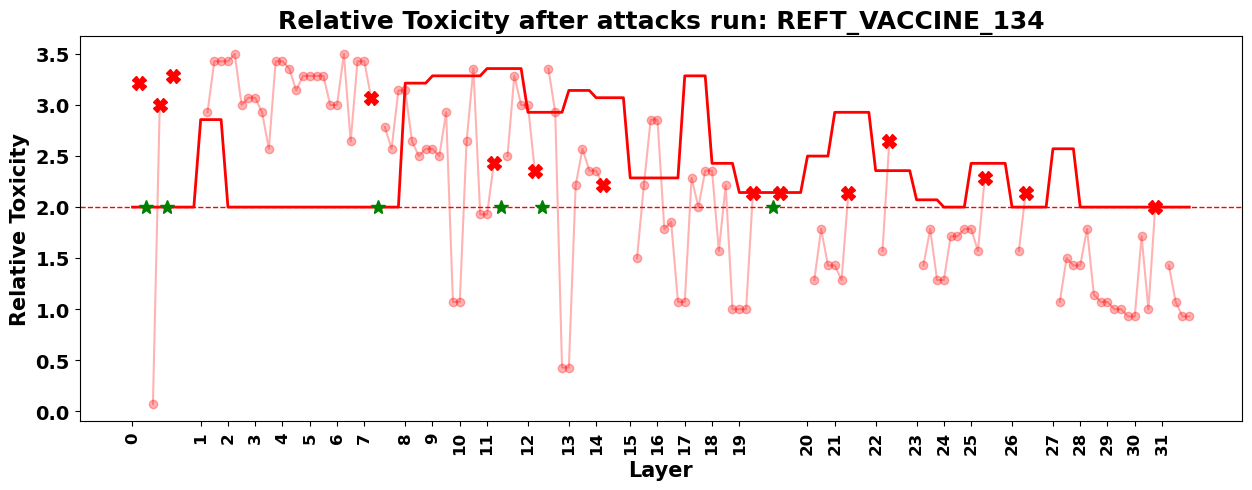

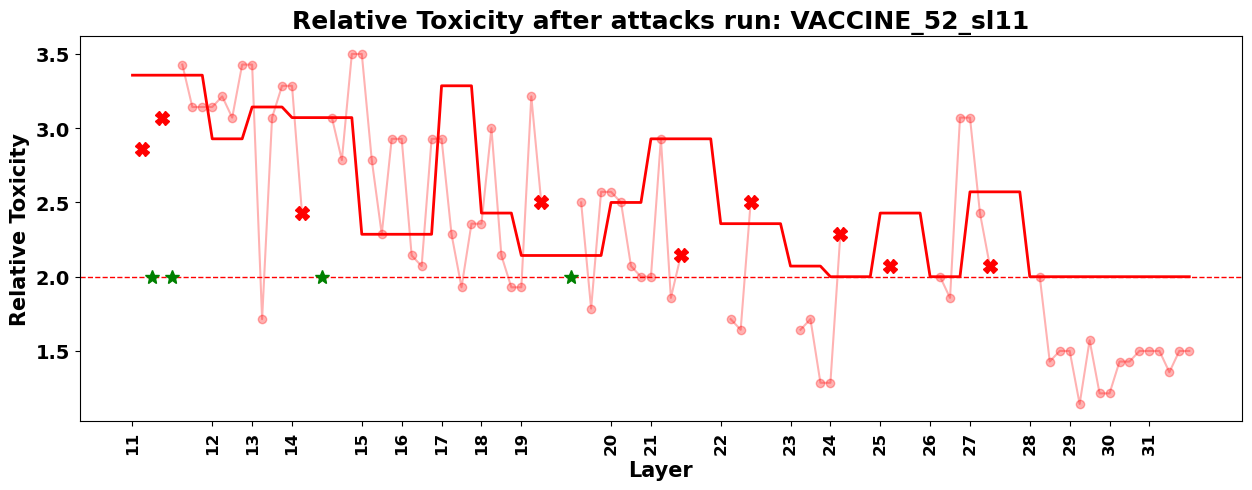

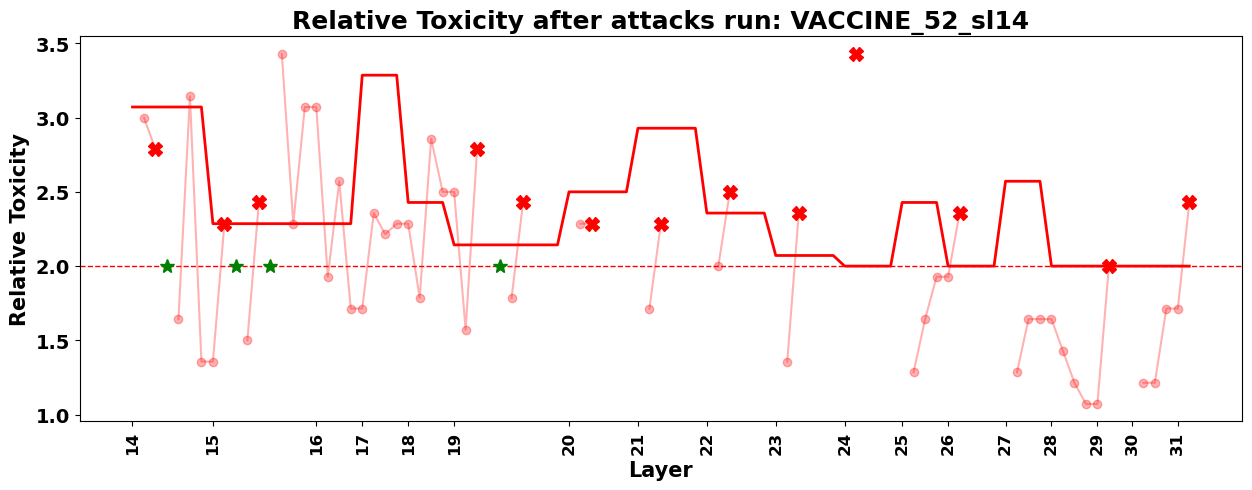

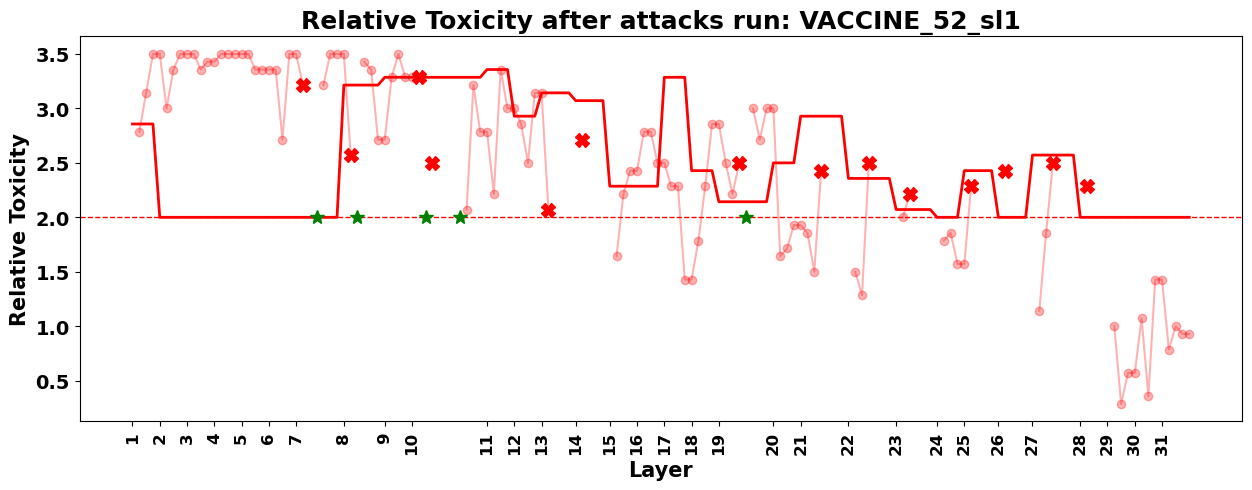

In [189]:
legend = True
run_names = list(set([col.split(' -')[0] for col in omni.columns if 'VACCINE' in col]))

for run_to_analyze in run_names:

    if 'sl' in run_to_analyze:
        starting_layer = int(run_to_analyze.split('sl')[1])
    else:
        starting_layer = 0

    columns_to_drop = [col for col in omni.columns if not col.split(' -')[0] == run_to_analyze]
    run_ds = omni.drop(columns=columns_to_drop)
    # run_ds[run_to_analyze + ' - IMMUNIZING_LAYER'].ffill(inplace=True)
    run_ds['action'] = run_ds[run_to_analyze + ' - Toxicity after attacks'].notna().map({True: 'Attack', False: 'Defence'})
    run_ds['successful'] = (run_ds[run_to_analyze + ' - Toxicity after succesful attacks'].notna() \
     | run_ds[run_to_analyze + ' - Toxicity after succesful defences'].notna())
    run_ds['vaccine'] = run_ds[run_to_analyze + ' - Absorbed defences at layer'].notna()
    columns_to_drop = [col for col in run_ds.columns if 'succesful' in col or 'Absorbed' in col]
    run_ds = run_ds.drop(columns=columns_to_drop)
    run_ds.columns = ['layer',
           'attack Toxicity',
           'defence Toxicity', 
           'action',
           'successful',
           'vaccine']

    # Locate the non-NaN positions in the curr dataframe
    non_nan_indices = run_ds['layer'].dropna().index
    run_ds['mean baseline attack toxicity'] = float('nan')
    run_ds.loc[non_nan_indices, 'mean baseline attack toxicity'] = baseline_ds['mean baseline attack toxicity'].values[starting_layer:]

    # strategy to plot the baseline only in the useful region:
    last_valid_idx = run_ds['attack Toxicity'].last_valid_index()
    filled_baseline_attack_tox = run_ds['mean baseline attack toxicity'].ffill()
    run_ds['mean baseline attack toxicity'] = filled_baseline_attack_tox.where(run_ds.index <= last_valid_idx)

    ###
    ### Plot Creation
    ###

    plt.figure(figsize=(15, 5))  # Adjust the figure size if needed

    plt.plot(run_ds['attack Toxicity'], marker='o', linestyle='-', color='red', label='Attack toxicity (immunization track)', alpha=0.3,)

    # plt.plot(run_ds['defence Toxicity'], marker='o', linestyle='-', label='Toxicity after defence')

    plt.plot(run_ds['mean baseline attack toxicity'], linestyle='-', lw=2, color='red', label='Baseline attack toxicity')


    """
    plt.axhline(y=max_toxicity_treshold, color='pink', 
            linestyle='dashed', linewidth=1.5, 
            label='Valid defence toxicity upper treshold')
    """

    plt.axhline(y=min_attack_toxicity_treshold, color='red', linestyle='dashed', 
                linewidth=1,
                label='min. toxicity treshold')

    label_trick = False
    # Add crosses where the marker column is True
    for x, y, m in zip(run_ds['attack Toxicity'].index, run_ds['attack Toxicity'], run_ds['successful']):
        if m:  # Check if marker is True
            if not label_trick:
                plt.plot(x, y, marker='X', markersize=10, color='red', 
                         label='Valid Attack (enough performance)')  # Plot cross
                label_trick = True
            else:
                plt.plot(x, y, marker='X', markersize=10, color='red')  # Plot cross

    # Immunization points:
    label_trick = False

    for x, p, m in zip(run_ds['vaccine'].index, run_ds['defence Toxicity'], run_ds['vaccine']):
        if m:
            if not label_trick:
                # plt.plot(x, p, marker='*', markersize=10, color='blue',label='Immunization Point')
                plt.plot(x, min_attack_toxicity_treshold, marker='*',
                         markersize=10, color='green', label='Immunization point')
                # plt.axvline(x=x, linestyle='--', color='blue', label='Immunization Point')  # Add vertical line
                label_trick = True
            else:
                # plt.plot(x, p, marker='*', markersize=10, color='blue')
                plt.plot(x, min_attack_toxicity_treshold, marker='*',
                         markersize=10, color='green')
                # plt.axvline(x=x, linestyle='--', color='blue')  # Add vertical line

    # Customize ticks
    plt.xticks(fontsize=12, fontweight='bold',
               ticks=run_ds['layer'].dropna().index,
               labels=run_ds['layer'].dropna().astype(int),
               rotation=90)

    plt.yticks(fontsize=14, fontweight='bold')

    plt.xlabel('Layer', fontdict=axis_font_dict)
    plt.ylabel('Relative Toxicity', fontdict=axis_font_dict)
    plt.title(f'Relative Toxicity after attacks run: {run_to_analyze}', fontdict=title_font_dict)
    if legend:
        plt.legend(
            prop=legend_font_dict,
            # bbox_to_anchor=(1.05, 1),
            loc='lower right')
        legend = False

    plt.show()

# Quantitative results.

## Attack Surface Ratio:

### Baselines:

In [406]:
runs = list(set([col.split(' -')[0] for col in omni.columns if 'BASELINE' in col]))
cols_to_keep = [col for col in omni.columns if 'LAYER' in col or ' attacks' in col]
quantitative_ds = omni[cols_to_keep].copy()

In [427]:
run_dss = []
for run in runs:
    run_cols = [col for col in quantitative_ds if col.split(' -')[0]  == run]
    run_ds = quantitative_ds[run_cols].copy()
    
    # Baseline retrocompat (before step fix)
    first_succesful_attack_step = run_ds[f'{run} - Toxicity after succesful attacks'].dropna().index[0]
    run_ds[f'{run} - IMMUNIZING_LAYER'].loc[first_succesful_attack_step] = 0.0
    run_ds[f'{run} - IMMUNIZING_LAYER'].loc[first_succesful_attack_step + 1] = 1.0
    # EO retrocompat
    
    run_ds[f'{run} - IMMUNIZING_LAYER'].ffill(inplace=True)    
    run_ds['successful_attack'] = (run_ds[f'{run} - Toxicity after attacks'].notna().map({True: 0, False: float('nan')}))
    run_ds['successful_attack'].loc[run_ds[f'{run} - Toxicity after succesful attacks'].dropna().index] = 1.0
    run_ds = run_ds.groupby(f'{run} - IMMUNIZING_LAYER')['successful_attack'].mean().reset_index()
    run_ds.columns = ['layer', 'ASR']
    run_dss.append(run_ds)

In [428]:
baseline_asr = pd.concat(run_dss).groupby('layer').mean().reset_index()

### Full Immunization track:

In [436]:
runs = list(set([col.split(' -')[0] for col in omni.columns if not 'sl' in col and not 'BASELINE' in col]))

cols_to_keep = [col for col in omni.columns if 'LAYER' in col or 'attacks' in col]
quantitative_ds = omni[cols_to_keep].copy()

In [437]:
run_dss = []
for run in runs:
    run_cols = [col for col in quantitative_ds if col.split(' -')[0]  == run]
    run_ds = quantitative_ds[run_cols].copy()
    
    run_ds[f'{run} - IMMUNIZING_LAYER'].ffill(inplace=True)    
    run_ds['successful_attack'] = (run_ds[f'{run} - Toxicity after attacks'].notna().map({True: 0, False: float('nan')}))
    run_ds['successful_attack'].loc[run_ds[f'{run} - Toxicity after succesful attacks'].dropna().index] = 1.0
    run_ds = run_ds.groupby(f'{run} - IMMUNIZING_LAYER')['successful_attack'].mean().reset_index()
    run_ds.columns = ['layer', 'ASR']
    run_dss.append(run_ds)

In [438]:
full_it_asr = pd.concat(run_dss).groupby('layer').mean().reset_index()

### Partial Immunization track:

In [441]:
runs = list(set([col.split(' -')[0] for col in omni.columns if 'sl' in col]))

cols_to_keep = [col for col in omni.columns if 'LAYER' in col or 'attacks' in col]
quantitative_ds = omni[cols_to_keep].copy()

In [442]:
run_dss = []
for run in runs:
    run_cols = [col for col in quantitative_ds if col.split(' -')[0]  == run]
    run_ds = quantitative_ds[run_cols].copy()
    
    run_ds[f'{run} - IMMUNIZING_LAYER'].ffill(inplace=True)    
    run_ds['successful_attack'] = (run_ds[f'{run} - Toxicity after attacks'].notna().map({True: 0, False: float('nan')}))
    run_ds['successful_attack'].loc[run_ds[f'{run} - Toxicity after succesful attacks'].dropna().index] = 1.0
    run_ds = run_ds.groupby(f'{run} - IMMUNIZING_LAYER')['successful_attack'].mean().reset_index()
    run_ds.columns = ['layer', 'ASR']
    run_dss.append(run_ds)

In [443]:
partial_it_asr = pd.concat(run_dss).groupby('layer').mean().reset_index()

### Comprehensive Immunization track:

In [444]:
runs = list(set([col.split(' -')[0] for col in omni.columns if not 'BASELINE' in col]))

cols_to_keep = [col for col in omni.columns if 'LAYER' in col or 'attacks' in col]
quantitative_ds = omni[cols_to_keep].copy()

In [445]:
run_dss = []
for run in runs:
    run_cols = [col for col in quantitative_ds if col.split(' -')[0]  == run]
    run_ds = quantitative_ds[run_cols].copy()
    
    run_ds[f'{run} - IMMUNIZING_LAYER'].ffill(inplace=True)    
    run_ds['successful_attack'] = (run_ds[f'{run} - Toxicity after attacks'].notna().map({True: 0, False: float('nan')}))
    run_ds['successful_attack'].loc[run_ds[f'{run} - Toxicity after succesful attacks'].dropna().index] = 1.0
    run_ds = run_ds.groupby(f'{run} - IMMUNIZING_LAYER')['successful_attack'].mean().reset_index()
    run_ds.columns = ['layer', 'ASR']
    run_dss.append(run_ds)

In [446]:
comp_it_asr = pd.concat(run_dss).groupby('layer').mean().reset_index()

### Plot:

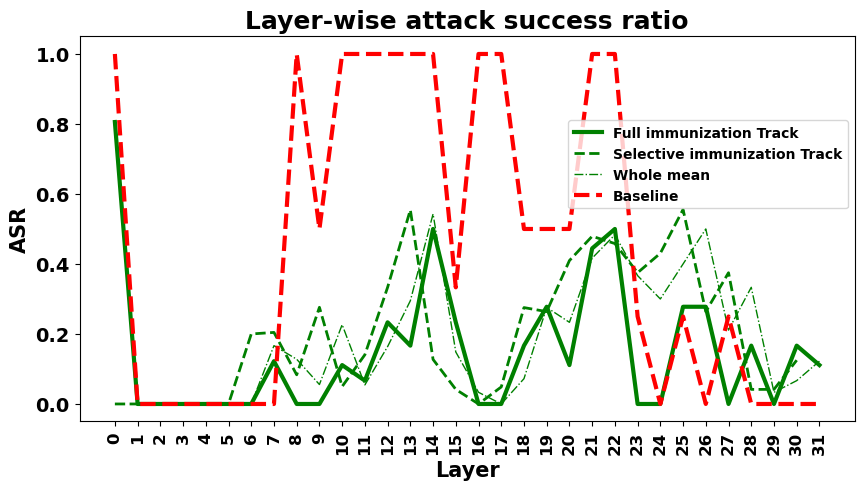

In [451]:
plt.figure(figsize=(10, 5))  # Adjust the figure size if needed

plt.plot(full_it_asr['ASR'], linestyle='-', lw=3, color='green', label='Full immunization Track')
plt.plot(partial_it_asr['ASR'], linestyle='--', lw=2, color='green', label='Selective immunization Track')
plt.plot(comp_it_asr['ASR'], linestyle='-.', lw=1, color='green', label='Whole mean')

plt.plot(baseline_asr['ASR'], linestyle='--', lw=3, color='red', label='Baseline')

# Customize ticks
plt.xticks(fontsize=12, fontweight='bold',
           ticks=it_asr['layer'].dropna().index,
           labels=it_asr['layer'].dropna().astype(int),
           rotation=90)

plt.yticks(fontsize=14, fontweight='bold')

plt.xlabel('Layer', fontdict=axis_font_dict)
plt.ylabel('ASR', fontdict=axis_font_dict)
plt.title(f'Layer-wise attack success ratio', fontdict=title_font_dict)

plt.legend(
    prop=legend_font_dict,
    bbox_to_anchor=(1, 0.8),
    loc='upper right')
plt.show()

The Attack Success Ratio (ASR) is computed with (green lines) and without (red Baseline) the immunization rounds. 
For each layer, an attack is deemed as successful if and only if the fraction of toxicity augmentation and performance preservation are above the corresponding fixed tresholds. A notable decrease in ASR is observed when the immunization strate

## Immunization points:

In [629]:
omni = pd.read_csv('results/comprehensive_results.csv')

### Selective track:

In [607]:
runs = list(set([col.split(' -')[0] for col in omni.columns \
                 if not 'BASELINE' in col \
                 and not 'STEP' in col \
                 and 'sl' in col]))

cols_to_keep = [col for col in omni.columns \
                if ('LAYER' in col \
                or 'attacks' in col \
                or 'absorbed' in col \
                or 'defences' in col) \
                and not 'MAX' in col \
                and not 'MIN' in col]
quantitative_ds = omni[cols_to_keep].copy()

In [608]:
absorbed_dss = []
for run in runs:
    run_cols = [col for col in quantitative_ds if col.split(' -')[0]  == run]
    run_ds = quantitative_ds[run_cols].copy()
    run_ds[f'{run} - IMMUNIZING_LAYER'].ffill(inplace=True)    

    absorbed_ds = run_ds.loc[run_ds[f'{run} - Absorbed defences at layer'].dropna().index]
    absorbed_ds = absorbed_ds[[f'{run} - Absorbed defences at layer', 
                               f'{run} - IMMUNIZING_LAYER']]
    absorbed_ds.columns = ['absortion_at_layer', 'Selective track']
    absorbed_dss.append(absorbed_ds)

In [609]:
layer_defence_likelihood = pd.concat(absorbed_dss).groupby('absortion_at_layer').count()/ len(runs)
sel_it_ldl = layer_defence_likelihood.reindex(range(0,32))

### Full immunization track:

In [630]:
runs = list(set([col.split(' -')[0] for col in omni.columns \
                 if not 'BASELINE' in col \
                 and not 'STEP' in col \
                 and not 'sl' in col]))

cols_to_keep = [col for col in omni.columns \
                if ('LAYER' in col \
                or 'attacks' in col \
                or 'absorbed' in col \
                or 'defences' in col) \
                and not 'MAX' in col \
                and not 'MIN' in col]
quantitative_ds = omni[cols_to_keep].copy()

In [631]:
absorbed_dss = []
for run in runs:
    run_cols = [col for col in quantitative_ds if col.split(' -')[0]  == run]
    run_ds = quantitative_ds[run_cols].copy()
    run_ds[f'{run} - IMMUNIZING_LAYER'].ffill(inplace=True)    

    absorbed_ds = run_ds.loc[run_ds[f'{run} - Absorbed defences at layer'].dropna().index]
    absorbed_ds = absorbed_ds[[f'{run} - Absorbed defences at layer', 
                               f'{run} - IMMUNIZING_LAYER']]
    absorbed_ds.columns = ['absortion_at_layer', 'Full Immun. track']
    absorbed_dss.append(absorbed_ds)

In [632]:
layer_defence_likelihood = pd.concat(absorbed_dss).groupby('absortion_at_layer').count()/ len(runs)
full_it_ldl = layer_defence_likelihood.reindex(range(0,32))

### Comprehensive immunization track:

In [614]:
runs = list(set([col.split(' -')[0] for col in omni.columns if not 'BASELINE' in col and not 'STEP' in col]))

cols_to_keep = [col for col in omni.columns \
                if ('LAYER' in col \
                or 'attacks' in col \
                or 'absorbed' in col \
                or 'defences' in col) \
                and not 'MAX' in col \
                and not 'MIN' in col]
quantitative_ds = omni[cols_to_keep].copy()

In [615]:
absorbed_dss = []
for run in runs:
    run_cols = [col for col in quantitative_ds if col.split(' -')[0]  == run]
    run_ds = quantitative_ds[run_cols].copy()
    run_ds[f'{run} - IMMUNIZING_LAYER'].ffill(inplace=True)    

    absorbed_ds = run_ds.loc[run_ds[f'{run} - Absorbed defences at layer'].dropna().index]
    absorbed_ds = absorbed_ds[[f'{run} - Absorbed defences at layer', 
                               f'{run} - IMMUNIZING_LAYER']]
    absorbed_ds.columns = ['absortion_at_layer', 'Mean']
    absorbed_dss.append(absorbed_ds)

In [616]:
layer_defence_likelihood = pd.concat(absorbed_dss).groupby('absortion_at_layer').count()/ len(runs)
comp_it_ldl = layer_defence_likelihood.reindex(range(0,32))

### plot:

In [637]:
absorb_ds = pd.concat([sel_it_ldl,full_it_ldl, comp_it_ldl], axis=1).dropna(how='all')

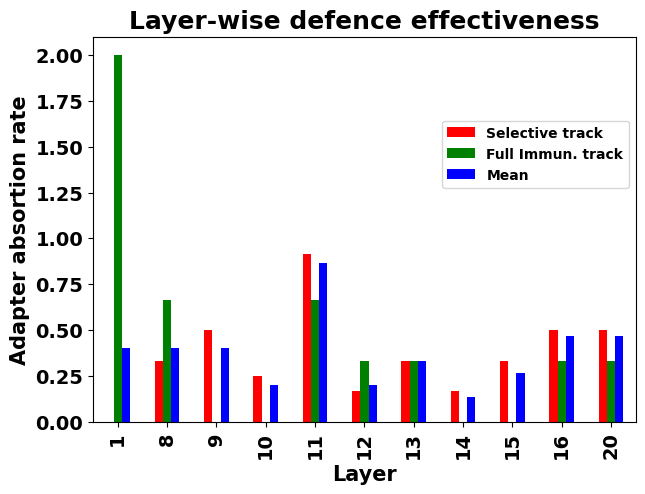

In [645]:

# Define custom colors for the bars
colors = ['red', 'green', 'blue']  # Example colors


absorb_ds.plot(kind='bar', legend=True, color=colors, figsize=(7, 5))
"""
plt.plot(layer_defence_likelihood['Defence absortion rate'], 
         marker='*', 
         lw=3, 
         color='green', 
         label='Defence absortion rate')
"""

plt.xticks(fontsize=14, fontweight='bold')

plt.yticks(fontsize=14, fontweight='bold')

plt.xlabel('Layer', fontdict=axis_font_dict)
plt.ylabel('Adapter absortion rate', fontdict=axis_font_dict)
plt.title(f'Layer-wise defence effectiveness', fontdict=title_font_dict)

plt.legend(
    prop=legend_font_dict,
    bbox_to_anchor=(1, 0.8),
    loc='upper right')
plt.show()

The mean defence effectiveness was measured for each layer in terms of the absorion rate of defence modules. A defence module is absorbed if and only if the resultant evaluation performance and safety is above the corresponding tresholds. "Selective track" refers to immunization iterations that started from a different layers with respect to the initial one. "Full" indicates runs that started from layer 0 (with different seeds) "Mean" computes the absortion rate taking into account both the selective and full immunization rounds. 